In [1]:
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import pandas as pd
import matplotlib.dates as dates
import obspy.signal.trigger as trigger
import matplotlib.pyplot as plt

def import_data(day, starttime, endtime):
    daypaths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day)
    starttime = obspy.UTCDateTime(starttime)
    endtime = obspy.UTCDateTime(endtime)
    data = load.import_corrected_data_for_single_day(daypaths)
    data.trim(starttime=starttime, endtime=endtime)
    return data

# day188_paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=188)
# day188 = load.import_corrected_data_for_single_day(day188_paths)
# starttime = obspy.UTCDateTime('2019-07-07T08:00:00')
# endtime = obspy.UTCDateTime('2019-07-07T11:00:00')
# day188.trim(starttime=starttime, endtime=endtime)

In [2]:
day141 = import_data(day=141, starttime='2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')

In [3]:
day188 = import_data(day=188, starttime='2019-07-07T08:40:00.0Z', endtime='2019-07-07T10:15:00.0Z')

In [4]:
day197 = import_data(day=197, starttime='2019-07-16T21:45:00.0Z', endtime='2019-07-17T00:00:00.337999Z')

In [5]:
day211 = import_data(day=211, starttime='2019-07-30T22:30:05.142999Z', endtime='2019-07-30T23:07:04.430999Z')

In [6]:
day141[0].stats

         network: 7F
         station: A00
        location: 01
         channel: GDH
       starttime: 2019-05-21T07:00:00.000000Z
         endtime: 2019-05-21T09:00:00.000000Z
   sampling_rate: 1000.0
           delta: 0.001
            npts: 7200001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 14851, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 60829696})
      processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 5, 21, 9, 0)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 5, 21, 7, 0))']

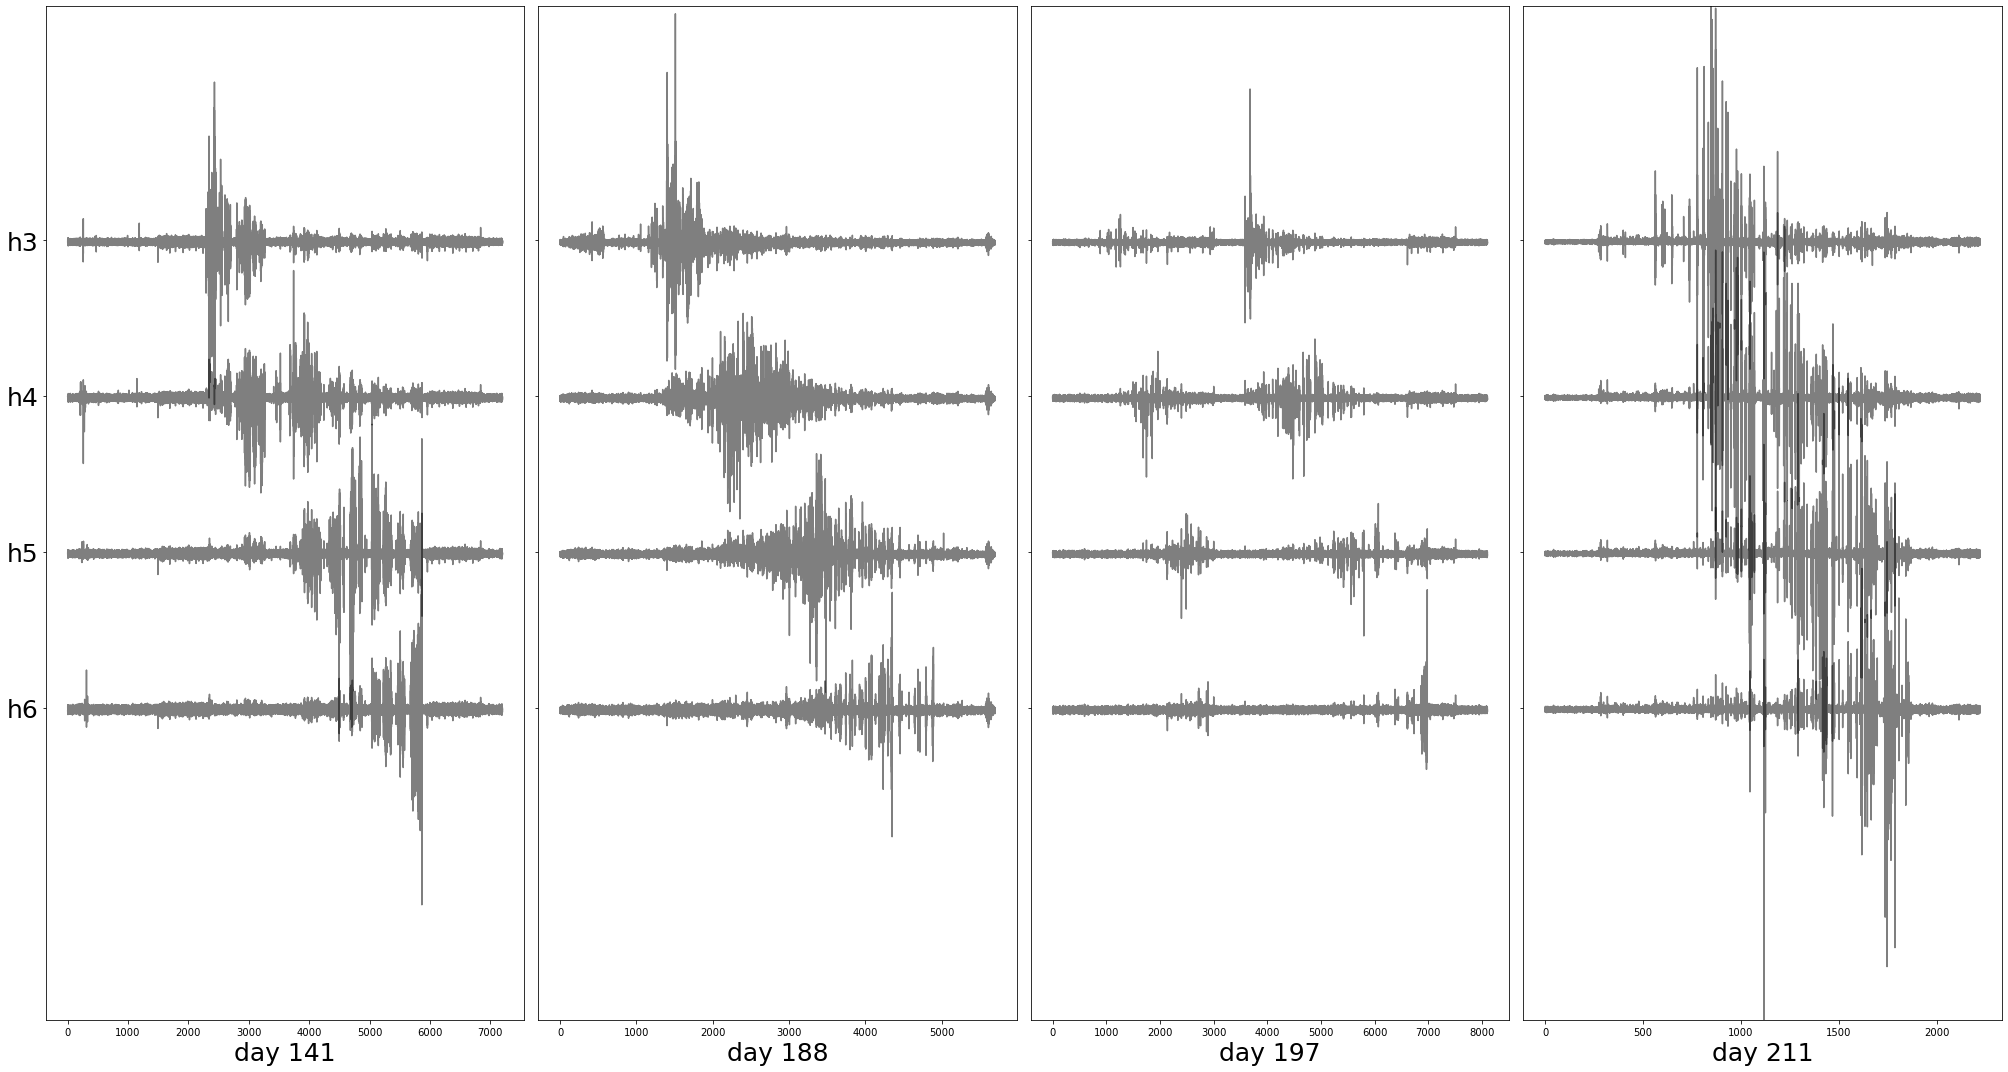

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(7*4, 15), sharey=True)

def plot_waveform(ax, stream, day):
    # times = [tr.times('matplotlib') for tr in stream][2:]
    times = [tr.times() for tr in stream][2:]
    data = [tr.data for tr in stream][2:]
    n = 0
    for t, d in zip(times, data):
        ax.plot(t, d - n * 10, color='black', alpha=0.5)
        n+=1
        
    ax.set_xlabel('day ' + str(day), fontsize=25)

plot_waveform(ax=ax[0], stream=day141, day=141)
plot_waveform(ax=ax[1], stream=day188, day=188)
plot_waveform(ax=ax[2], stream=day197, day=197)
plot_waveform(ax=ax[3], stream=day211, day=211)

ax[0].set_ylim(-50, 15)
ax[0].set_yticks([0, -10, -20, -30])
ax[0].set_yticklabels(['h3', 'h4', 'h5', 'h6'], fontsize=25)

# ax[0].text(s='day')

plt.tight_layout()

In [55]:
import matplotlib.dates as dates

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df

def plot_depths(df, cmap, day):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.first_hydrophone, cmap=cmap)
    ax.set_ylabel('day '+str(day), fontsize=25)
    ax.set_ylim(400, 50)
    return fig, ax

In [56]:
df141 = import_catalog(file='precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')

(<Figure size 1080x360 with 1 Axes>, <AxesSubplot:ylabel='day 211'>)

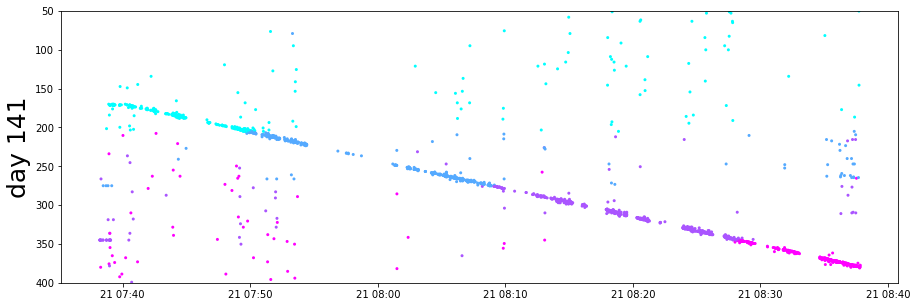

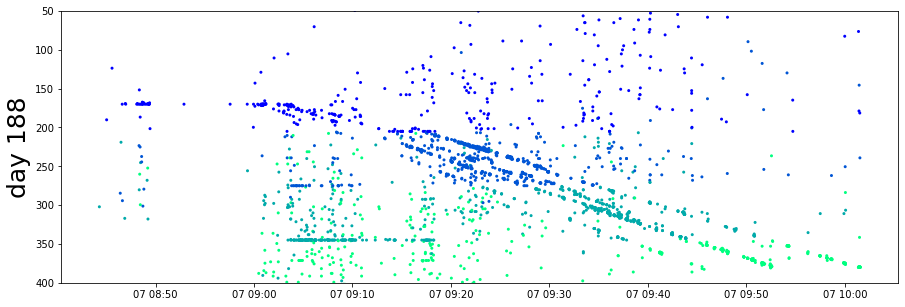

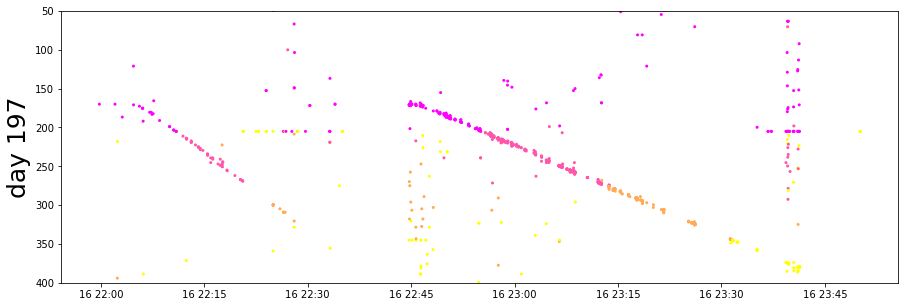

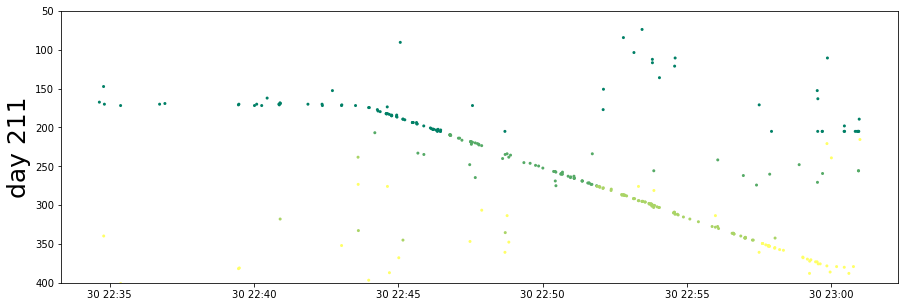

In [57]:
plot_depths(df=df141, cmap='cool', day=141)
plot_depths(df=df188, cmap='winter', day=188)
plot_depths(df=df197, cmap='spring', day=197)
plot_depths(df=df211, cmap='summer', day=211)

In [45]:
import matplotlib.dates as dates
# df141 = pd.read_csv('precision.csv')
# df141.sort_values(by='first_arrival', inplace=True)
# df141['arrival_datetime'] = df141.arrival_time.apply(dates.num2date)

(400.0, 50.0)

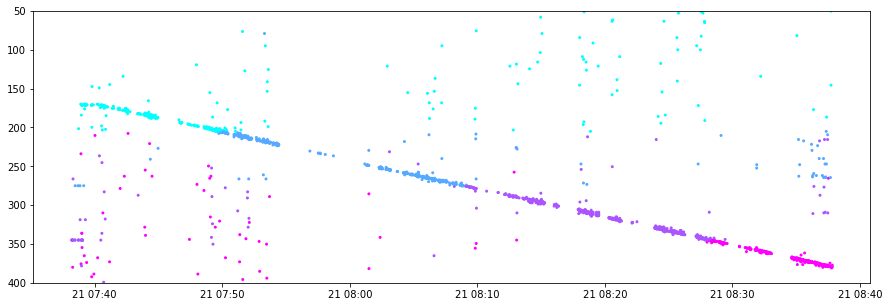

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
# df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

ax.scatter(df141.arrival_datetime, df141.depth, marker='.', linewidth=0, c=df141.first_hydrophone, cmap='cool')

ax.set_ylim(400, 50)

In [47]:
import matplotlib.dates as dates
df188 = pd.read_csv('188precision.csv')
df188.sort_values(by='first_arrival', inplace=True)
df188['arrival_datetime'] = df188.arrival_time.apply(dates.num2date)

(400.0, 50.0)

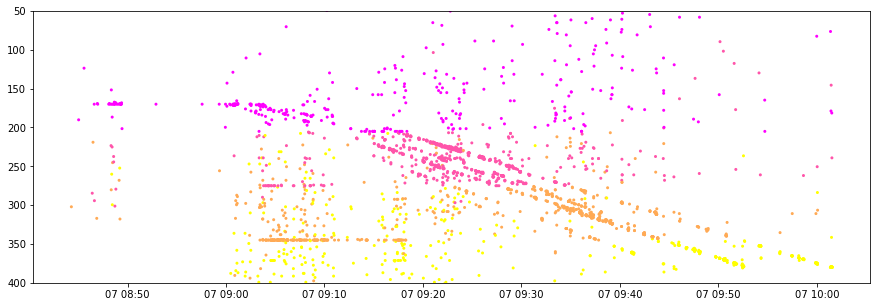

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
# df.set_index('arrival_datetime').depth.plot(ax=ax, linewidth=0, marker='.', color='limegreen')

ax.scatter(df188.arrival_datetime, df188.depth, marker='.', linewidth=0, c=df188.first_hydrophone, cmap='warm')

ax.set_ylim(400, 50)